In [25]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv(r"C:\Users\Niharika\Downloads\Feynn Labs\Task 1-Actual\EV_Dataset.csv")  
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96845 entries, 0 to 96844
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               96845 non-null  float64
 1   Month_Name         96845 non-null  object 
 2   Date               96845 non-null  object 
 3   State              96845 non-null  object 
 4   Vehicle_Class      96845 non-null  object 
 5   Vehicle_Category   96845 non-null  object 
 6   Vehicle_Type       96845 non-null  object 
 7   EV_Sales_Quantity  96845 non-null  float64
dtypes: float64(2), object(6)
memory usage: 5.9+ MB


In [27]:
df.isnull().sum()

Year                 0
Month_Name           0
Date                 0
State                0
Vehicle_Class        0
Vehicle_Category     0
Vehicle_Type         0
EV_Sales_Quantity    0
dtype: int64

In [28]:
df.Vehicle_Category.value_counts()

Vehicle_Category
Others        54423
2-Wheelers    13121
3-Wheelers    11491
Bus            9119
4-Wheelers     8691
Name: count, dtype: int64

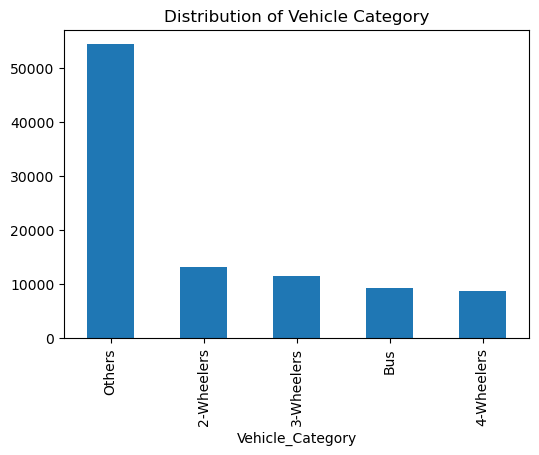

In [29]:
# Distribution of variable "Vehicle_Category"

plt.figure(figsize=(6,4))
df.Vehicle_Category.value_counts().plot.bar()
plt.title('Distribution of Vehicle Category')
plt.show()

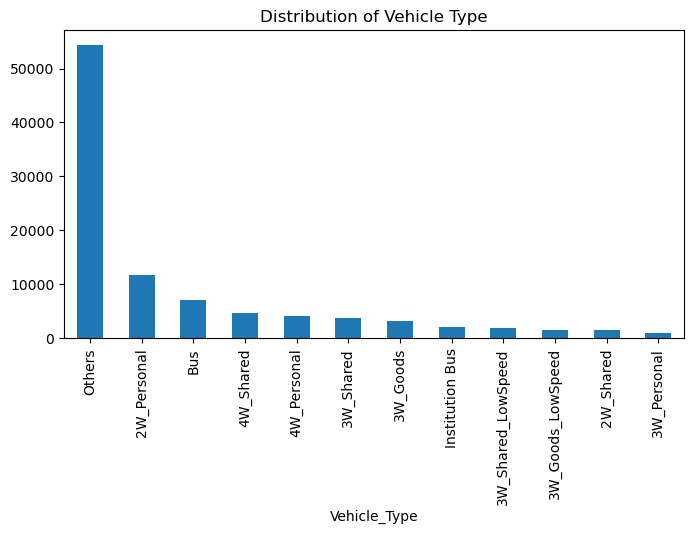

In [30]:
# Distribution of variable "Vehicle_Type"

plt.figure(figsize=(8,4))
df.Vehicle_Type.value_counts().plot.bar()
plt.title('Distribution of Vehicle Type')
plt.show()

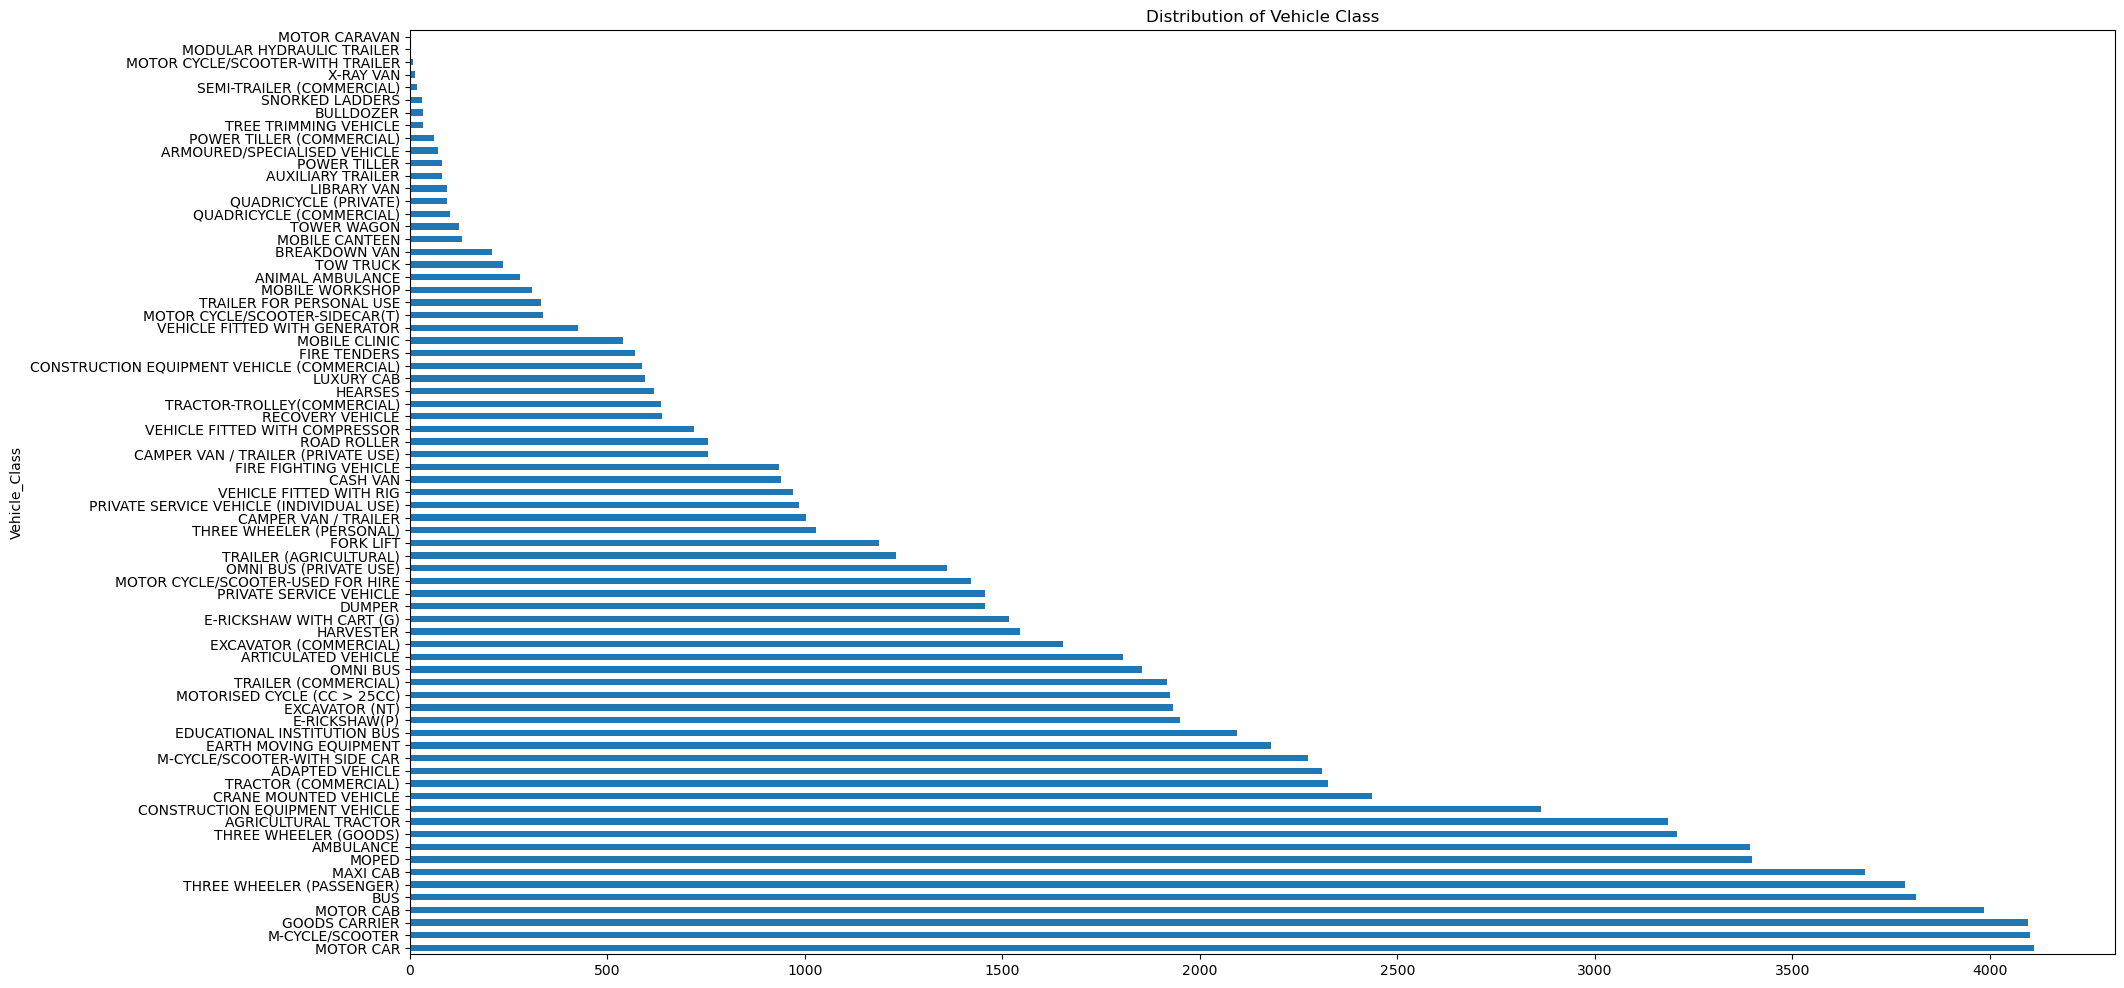

In [31]:
# Distribution of variable "Vehicle_Class"

plt.figure(figsize=(22,12))
df.Vehicle_Class.value_counts().plot.barh()
plt.title('Distribution of Vehicle Class')
plt.show()

<Axes: xlabel='Year'>

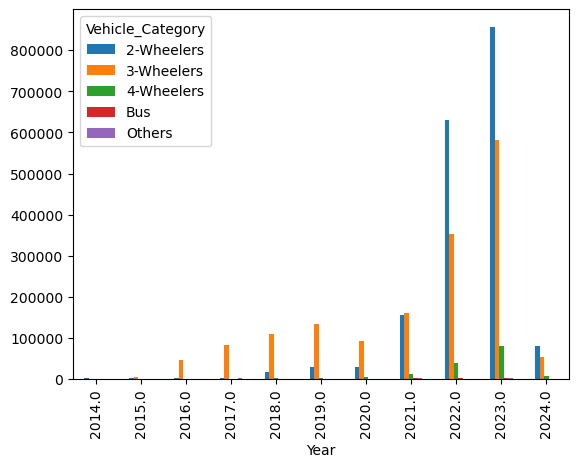

In [32]:
# Analysis of year-wise EV vehicles

pivot_table1 = pd.pivot_table(
    df,
    values='EV_Sales_Quantity',       # Column to aggregate
    index='Year',         # Rows
    columns='Vehicle_Category',       # Columns
    aggfunc='sum',        # Aggregation function
    fill_value=0          # Fill missing values with 0
)

pivot_table1.plot.bar()

<function matplotlib.pyplot.show(close=None, block=None)>

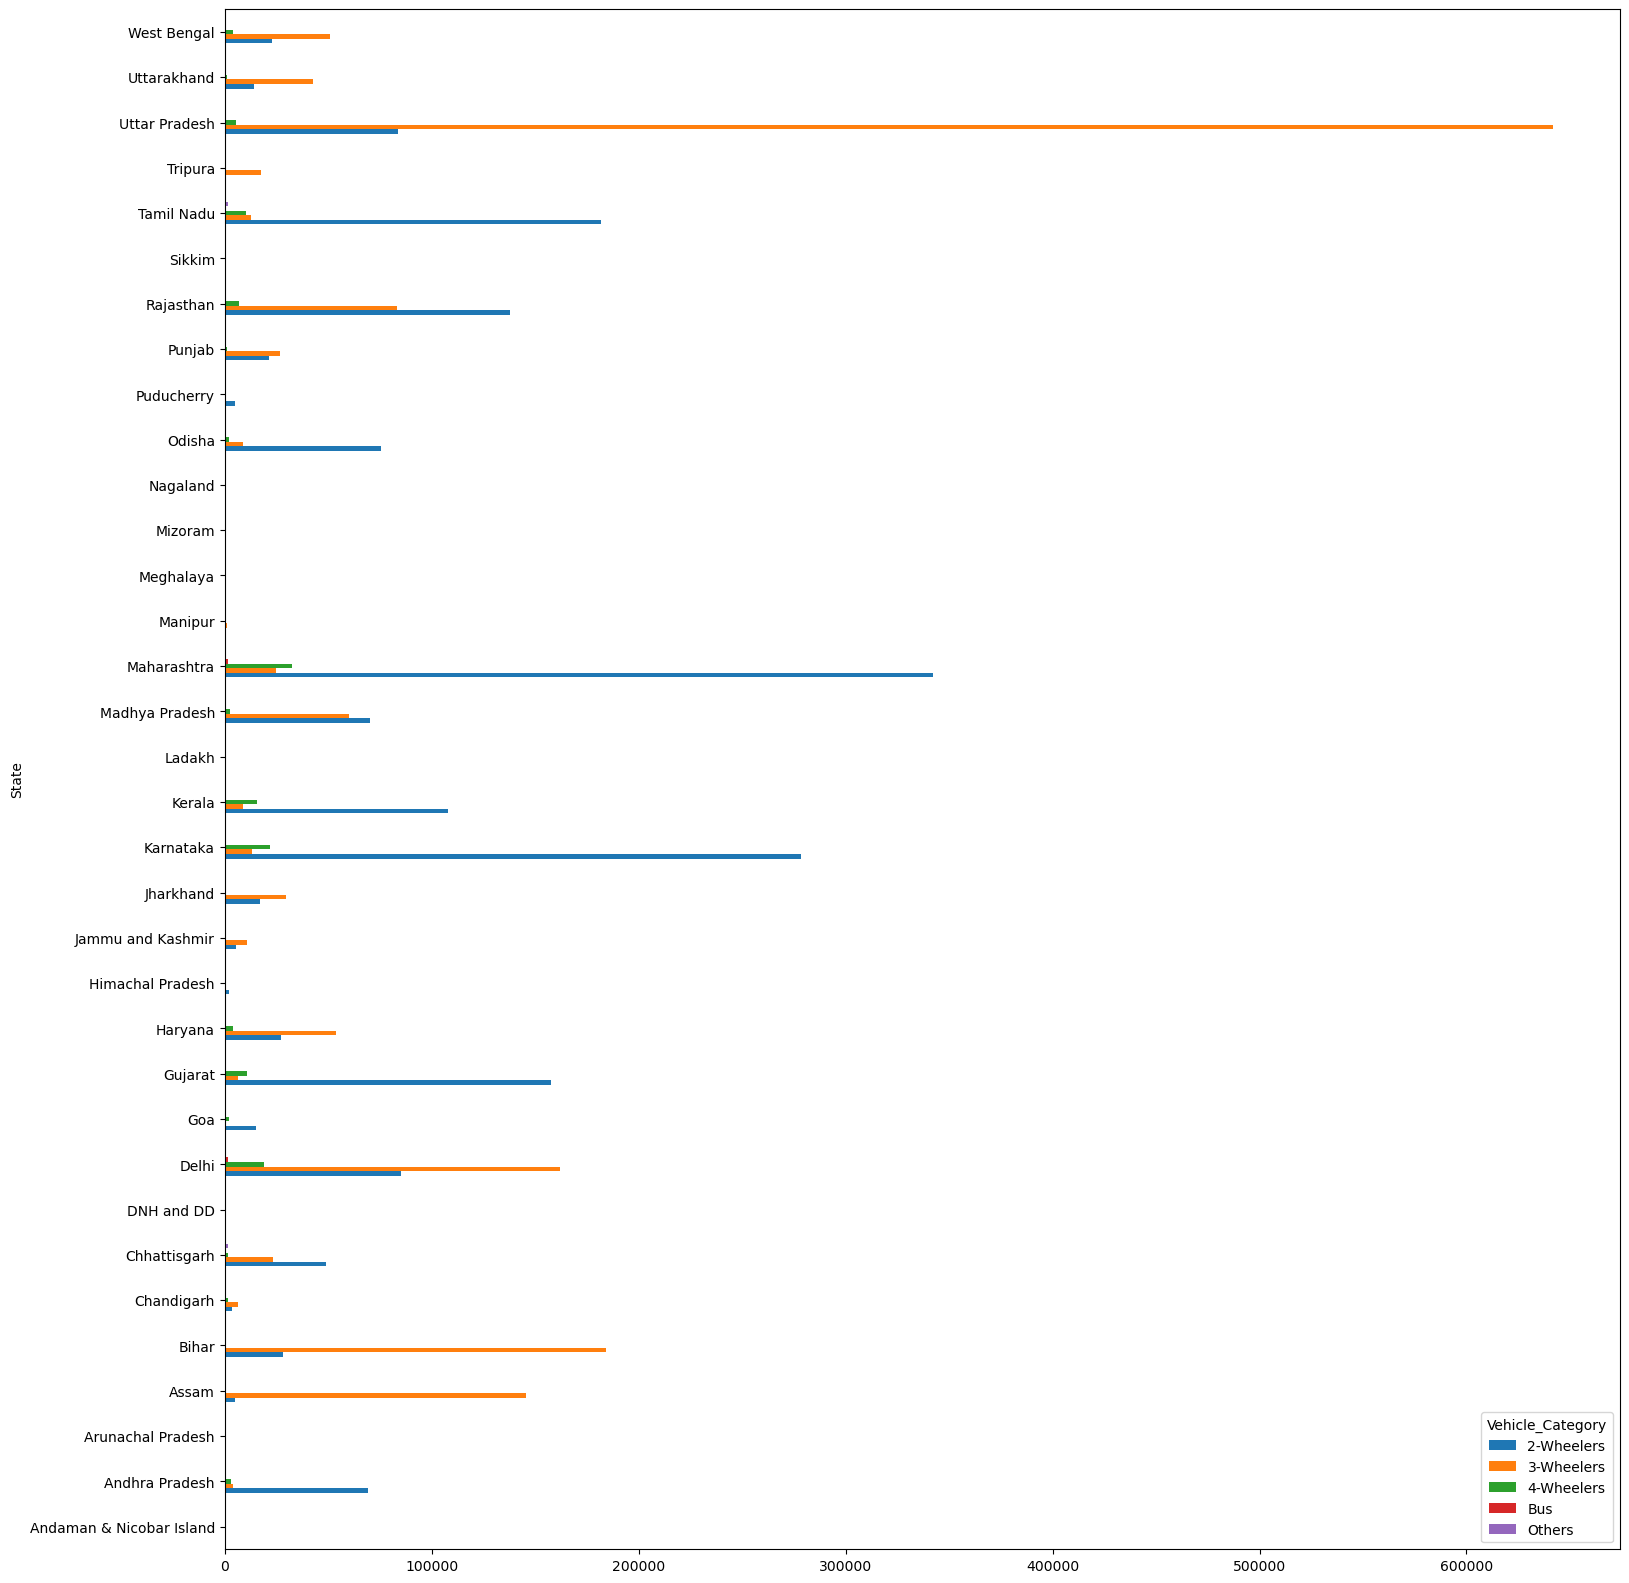

In [33]:
# Analysis of state-wise EV vehicles

pivot_table2 = pd.pivot_table(
    df,
    values='EV_Sales_Quantity',       # Column to aggregate
    index='State',         # Rows
    columns='Vehicle_Category',       # Columns
    aggfunc='sum',        # Aggregation function
    )

fig, ax = plt.subplots(figsize=(18, 20))
pivot_table2.plot.barh(ax=ax)
plt.show

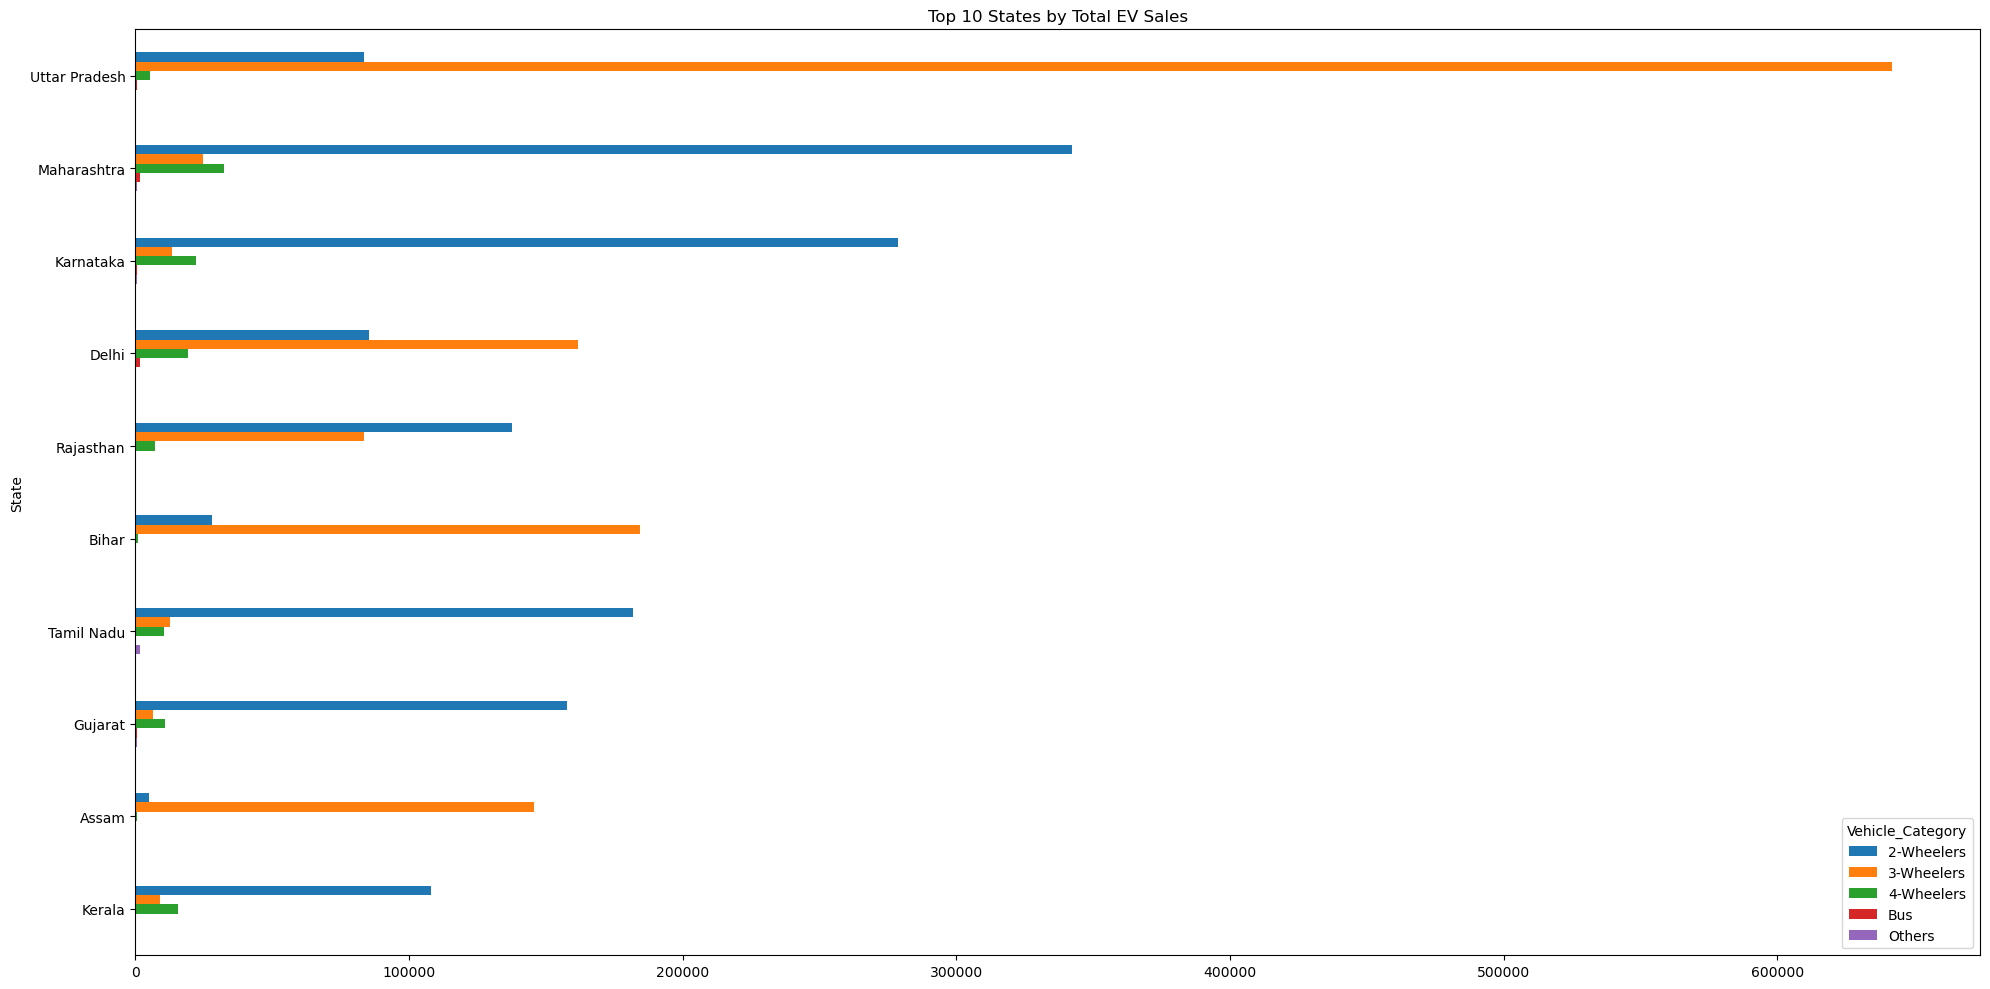

In [34]:
# Top 10 states by total sales of EV vehicles

# Compute total sales per state 
pivot_table2['Total'] = pivot_table2.sum(axis=1)

# Sort and filter top 10 states
pivot_sorted = pivot_table2.sort_values('Total', ascending=False).head(10)

# Drop 'Total' column for clean plot
pivot_sorted = pivot_sorted.drop(columns='Total')

# Plot as horizontal bar chart
fig, ax = plt.subplots(figsize=(20, 10))
pivot_sorted.plot.barh(ax=ax)

# Make largest bar appear at the top
ax.invert_yaxis()

plt.title("Top 10 States by Total EV Sales")
plt.tight_layout()
plt.show()

In [35]:
# Drop rows with missing target
df = df.dropna(subset=['Vehicle_Category'])

# Encode the target
label_encoder = LabelEncoder()
df['Vehicle_Category_Encoded'] = label_encoder.fit_transform(df['Vehicle_Category'])
df.Vehicle_Category_Encoded.value_counts()

Vehicle_Category_Encoded
4    54423
0    13121
1    11491
3     9119
2     8691
Name: count, dtype: int64

In [36]:
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Vehicle_Category_Encoded
0,2014.0,jan,1/1/2014,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0,4
1,2014.0,jan,1/1/2014,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0,4
2,2014.0,jan,1/1/2014,Andhra Pradesh,AMBULANCE,Others,Others,0.0,4
3,2014.0,jan,1/1/2014,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0,4
4,2014.0,jan,1/1/2014,Andhra Pradesh,BUS,Bus,Bus,0.0,3


In [37]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Month_num'] = df['Date'].dt.month
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Vehicle_Category_Encoded,Month_num
0,2014.0,jan,2014-01-01,Andhra Pradesh,ADAPTED VEHICLE,Others,Others,0.0,4,1
1,2014.0,jan,2014-01-01,Andhra Pradesh,AGRICULTURAL TRACTOR,Others,Others,0.0,4,1
2,2014.0,jan,2014-01-01,Andhra Pradesh,AMBULANCE,Others,Others,0.0,4,1
3,2014.0,jan,2014-01-01,Andhra Pradesh,ARTICULATED VEHICLE,Others,Others,0.0,4,1
4,2014.0,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0,3,1


In [38]:
# Drop unnecessary columns
features = df.drop(columns=['Vehicle_Category', 'Vehicle_Category_Encoded', 'Date', 'Month_Name'])

=== Random Forest Classification Report ===
              precision    recall  f1-score   support

  2-Wheelers       1.00      1.00      1.00      2567
  3-Wheelers       1.00      1.00      1.00      2306
  4-Wheelers       1.00      1.00      1.00      1775
         Bus       1.00      1.00      1.00      1875
      Others       1.00      1.00      1.00     10846

    accuracy                           1.00     19369
   macro avg       1.00      1.00      1.00     19369
weighted avg       1.00      1.00      1.00     19369

=== Decision Tree Classification Report ===
              precision    recall  f1-score   support

  2-Wheelers       1.00      1.00      1.00      2567
  3-Wheelers       1.00      1.00      1.00      2306
  4-Wheelers       1.00      1.00      1.00      1775
         Bus       1.00      1.00      1.00      1875
      Others       1.00      1.00      1.00     10846

    accuracy                           1.00     19369
   macro avg       1.00      1.00      1.00

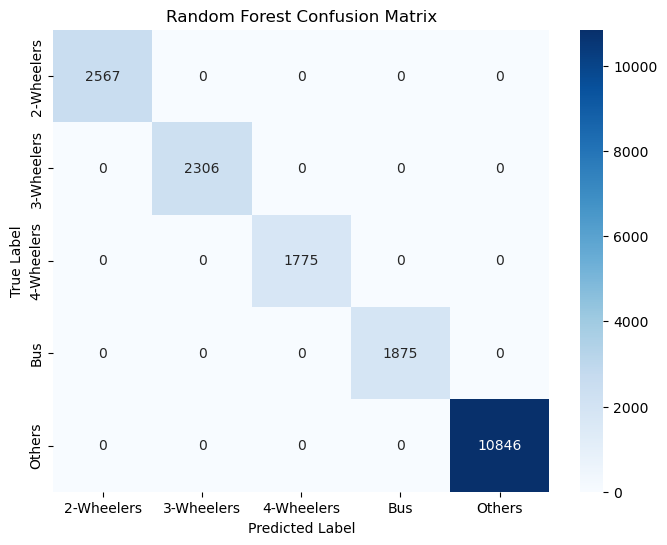

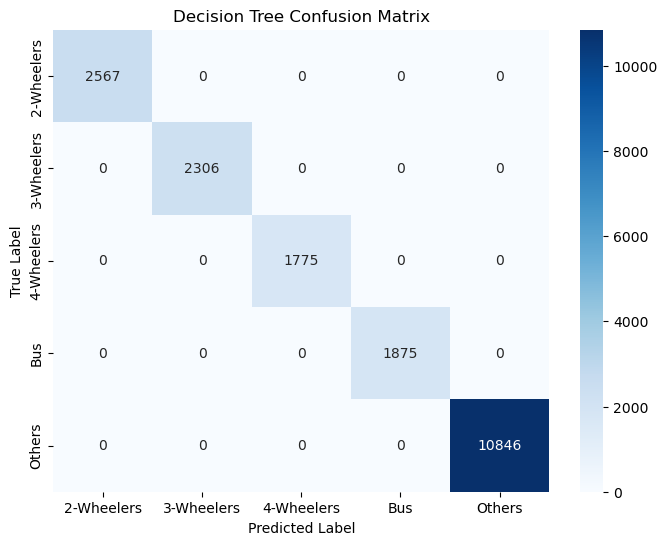

In [39]:
# Convert categorical variables to dummy/one-hot encoding
features_encoded = pd.get_dummies(features)

# Define X and y
X = features_encoded
y = df['Vehicle_Category_Encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === Random Forest ===
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("=== Random Forest Classification Report ===")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

# === Decision Tree ===
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("=== Decision Tree Classification Report ===")
print(classification_report(y_test, y_pred_dt, target_names=label_encoder.classes_))

# Plot Confusion Matrix for both models
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    class_labels = label_encoder.classes_.tolist()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels,
                yticklabels=class_labels)
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_conf_matrix(y_test, y_pred_rf, "Random Forest Confusion Matrix")
plot_conf_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")

## Applying XGBoost

In [41]:
df['Vehicle_Category'].value_counts()

Vehicle_Category
Others        54423
2-Wheelers    13121
3-Wheelers    11491
Bus            9119
4-Wheelers     8691
Name: count, dtype: int64

In [42]:
# Filter only valid category values (e.g., '2W', '3W', '4W')
df = df[df['Vehicle_Category'].isin(['2-Wheelers', '3-Wheelers', '4-Wheelers','Bus'])]

In [43]:
# Feature Engineering

# Convert date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

# Extract features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df.head()

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity,Vehicle_Category_Encoded,Month_num,Month
4,2014,jan,2014-01-01,Andhra Pradesh,BUS,Bus,Bus,0.0,3,1,1
7,2014,jan,2014-01-01,Andhra Pradesh,EDUCATIONAL INSTITUTION BUS,Bus,Institution Bus,0.0,3,1,1
13,2014,jan,2014-01-01,Andhra Pradesh,M-CYCLE/SCOOTER,2-Wheelers,2W_Personal,1.0,0,1,1
14,2014,jan,2014-01-01,Andhra Pradesh,MOTOR CAB,4-Wheelers,4W_Shared,0.0,2,1,1
15,2014,jan,2014-01-01,Andhra Pradesh,MOTOR CAR,4-Wheelers,4W_Personal,0.0,2,1,1


In [44]:
# Aggregate monthly sales by State and Vehicle Category
monthly = df.groupby(['Year', 'Month', 'State', 'Vehicle_Category'])['EV_Sales_Quantity'].sum().reset_index()
monthly.head()

,Year,Month,State,Vehicle_Category,EV_Sales_Quantity
0,2014,1,Andaman & Nicobar Island,2-Wheelers,0.0
1,2014,1,Andaman & Nicobar Island,3-Wheelers,0.0
2,2014,1,Andaman & Nicobar Island,4-Wheelers,0.0
3,2014,1,Andaman & Nicobar Island,Bus,0.0
4,2014,1,Andhra Pradesh,2-Wheelers,1.0


In [45]:
# Total sales per month-state for share calculation
monthly['Total_Sales'] = monthly.groupby(['Year', 'Month', 'State'])['EV_Sales_Quantity'].transform('sum')
monthly.head()

,Year,Month,State,Vehicle_Category,EV_Sales_Quantity,Total_Sales
0,2014,1,Andaman & Nicobar Island,2-Wheelers,0.0,0.0
1,2014,1,Andaman & Nicobar Island,3-Wheelers,0.0,0.0
2,2014,1,Andaman & Nicobar Island,4-Wheelers,0.0,0.0
3,2014,1,Andaman & Nicobar Island,Bus,0.0,0.0
4,2014,1,Andhra Pradesh,2-Wheelers,1.0,1.0


In [46]:
# Market share = category sales / total sales
monthly['Market_Share'] = monthly['EV_Sales_Quantity'] / monthly['Total_Sales']
monthly.head()

,Year,Month,State,Vehicle_Category,EV_Sales_Quantity,Total_Sales,Market_Share
0,2014,1,Andaman & Nicobar Island,2-Wheelers,0.0,0.0,NaN
1,2014,1,Andaman & Nicobar Island,3-Wheelers,0.0,0.0,NaN
2,2014,1,Andaman & Nicobar Island,4-Wheelers,0.0,0.0,NaN
3,2014,1,Andaman & Nicobar Island,Bus,0.0,0.0,NaN
4,2014,1,Andhra Pradesh,2-Wheelers,1.0,1.0,1.0


In [47]:
# Label encode categorical vars
le_state = LabelEncoder()
le_cat = LabelEncoder()
monthly['State_Code'] = le_state.fit_transform(monthly['State'])
monthly['Category_Code'] = le_cat.fit_transform(monthly['Vehicle_Category'])

In [48]:
# Features and target
features = ['Year', 'Month', 'State_Code', 'Category_Code']
X = monthly[features]
y = monthly['Market_Share']

In [49]:
print(X.head())
print(y.head())

   Year  Month  State_Code  Category_Code
0  2014      1           0              0
1  2014      1           0              1
2  2014      1           0              2
3  2014      1           0              3
4  2014      1           1              0
0    NaN
1    NaN
2    NaN
3    NaN
4    1.0
Name: Market_Share, dtype: float64


In [50]:
# Checking for null values
y.isnull().sum()

4516

In [51]:
y.fillna(0, inplace=True)
y.isnull().sum()

0

In [52]:
# MODEL TRAINING
from xgboost import XGBRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [53]:
# 3. PREDICTION & RANKING
monthly['Predicted_Share'] = model.predict(X)

# Pick top category by predicted share per month-state
best_category = monthly.loc[monthly.groupby(['Year', 'Month', 'State'])['Predicted_Share'].idxmax()]

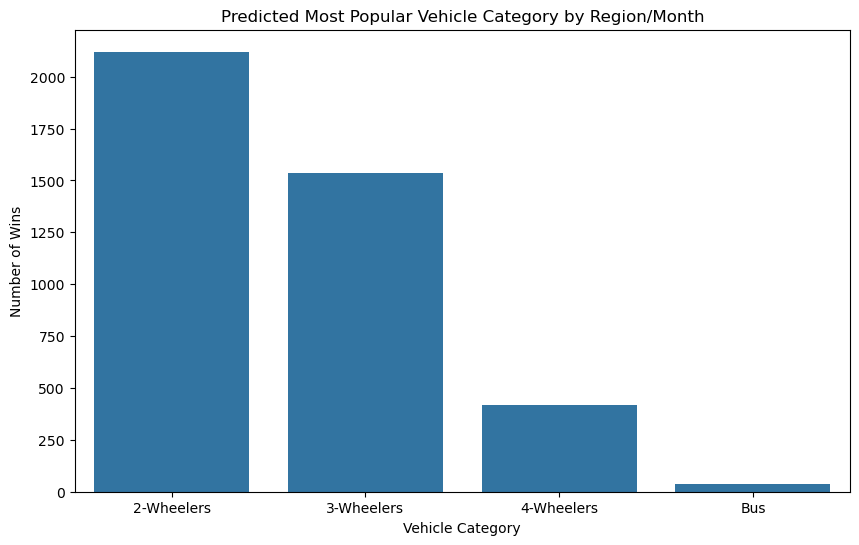

In [54]:
# 4. VISUALIZATION
plt.figure(figsize=(10, 6))
sns.countplot(data=best_category, x='Vehicle_Category', order=['2-Wheelers', '3-Wheelers', '4-Wheelers','Bus'])
plt.title('Predicted Most Popular Vehicle Category by Region/Month')
plt.xlabel('Vehicle Category')
plt.ylabel('Number of Wins')
plt.show()